<h2 align=center> Classify Radio Signals from Outer Space with Keras</h2>

In [1]:
from livelossplot.inputs.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


In [2]:
# Load and Preprocess SETI Data
train_images=pd.read_csv('datasets/train/images.csv',header=None)
train_labels=pd.read_csv('datasets/train/labels.csv',header=None)

val_images=pd.read_csv('datasets/validation/images.csv',header=None)
val_labels=pd.read_csv('datasets/validation/labels.csv',header=None)

In [3]:
train_images.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
5,0.694118,0.682353,0.705882,0.705882,0.666667,0.694118,0.674510,0.713726,0.690196,0.709804,...,0.658824,0.698039,0.694118,0.709804,0.725490,0.694118,0.729412,0.701961,0.694118,0.709804
6,0.717647,0.686275,0.760784,0.741176,0.709804,0.725490,0.733333,0.698039,0.654902,0.721569,...,0.705882,0.694118,0.737255,0.713726,0.682353,0.705882,0.713726,0.694118,0.721569,0.701961
7,0.713726,0.713726,0.658824,0.690196,0.682353,0.705882,0.709804,0.717647,0.733333,0.733333,...,0.690196,0.690196,0.721569,0.709804,0.729412,0.729412,0.694118,0.733333,0.721569,0.694118
8,0.658824,0.678431,0.729412,0.690196,0.705882,0.678431,0.658824,0.670588,0.713726,0.670588,...,0.721569,0.694118,0.717647,0.701961,0.627451,0.650980,0.686275,0.690196,0.698039,0.721569
9,0.721569,0.729412,0.764706,0.709804,0.701961,0.658824,0.709804,0.709804,0.698039,0.717647,...,0.650980,0.670588,0.745098,0.698039,0.745098,0.745098,0.694118,0.729412,0.756863,0.709804


In [4]:
train_labels.head(10)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [5]:
print(train_images.shape,train_labels.shape,val_images.shape,val_labels.shape)

(3200, 8192) (3200, 4) (800, 8192) (800, 4)


In [6]:
x_train = train_images.values.reshape(3200,64,128,1)
x_val = val_images.values.reshape(800,64,128,1)

y_train = train_labels.values
y_val = val_labels.values

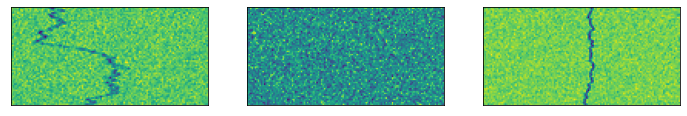

In [12]:
# Ploting 2D Spectrograms
plt.figure(0,figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

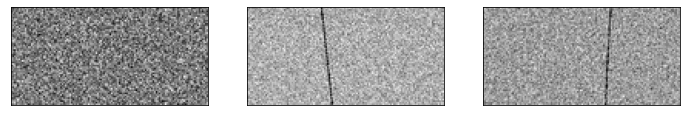

In [13]:
plt.figure(0,figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap='gray')

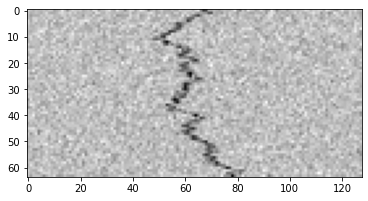

In [14]:
plt.imshow(np.squeeze(x_train[3]),cmap='gray')

In [15]:
# Creating Training and Validation Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

In [17]:
# Creating the CNN Model
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Conv2D(32,(5,5),padding='same',input_shape=(64,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())
# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(4, activation="softmax"))


In [20]:
# Learning Rate Scheduling and Compile the Model
initial_learning_rate=0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
optimizer=Adam(learning_rate=lr_schedule)

In [21]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

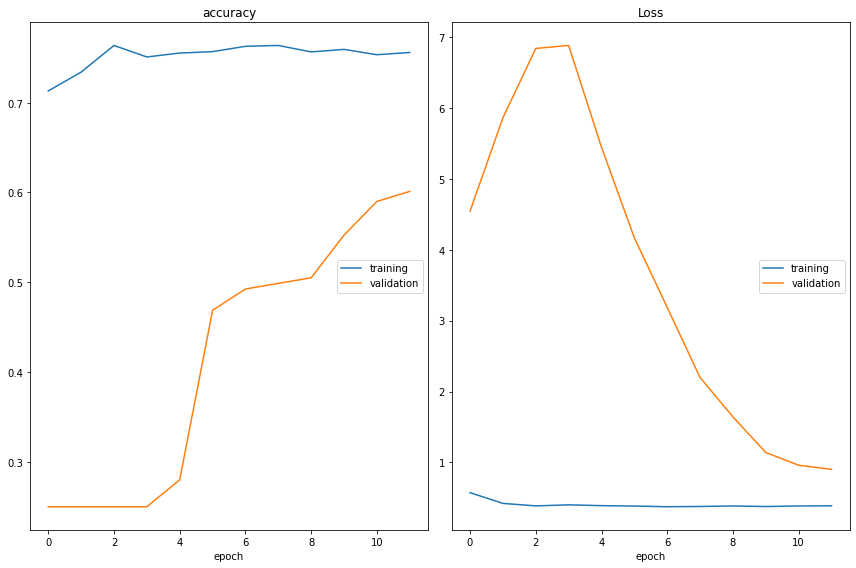

accuracy
	training         	 (min:    0.713, max:    0.764, cur:    0.756)
	validation       	 (min:    0.250, max:    0.601, cur:    0.601)
Loss
	training         	 (min:    0.374, max:    0.572, cur:    0.387)
	validation       	 (min:    0.902, max:    6.884, cur:    0.902)
100/100 [==============================] - 114s 1s/step - loss: 0.3867 - accuracy: 0.7559 - val_loss: 0.9019 - val_accuracy: 0.6012


In [22]:
# Training the Model
checkpoint = ModelCheckpoint("model_weight.h5" , monitor = "val_loss" , save_weights_only = True,
                            mode = "min" , verbose = 0)
callbacks = [PlotLossesCallback() , checkpoint]

batch_size = 32

history = model.fit(
        datagen_train.flow(x_train , y_train , batch_size = batch_size , shuffle = True),
        steps_per_epoch = len(x_train) // batch_size,
        validation_data = datagen_val.flow(x_val , y_val , batch_size = batch_size , shuffle = True),
        validation_steps = len(x_val) // batch_size,
        epochs = 12,
        callbacks = callbacks
)

In [25]:
# Model Evaluation
model.evaluate(x_val,y_val)

25/25 [==============================] - 5s 180ms/step - loss: 0.8974 - accuracy: 0.5888


[0.8973546028137207, 0.5887500047683716]

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val,1)
y_pred = np.argmax(model.predict(x_val),1)
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55       200
           1       0.23      0.21      0.22       200
           2       0.45      0.76      0.56       200
           3       1.00      1.00      1.00       200

    accuracy                           0.59       800
   macro avg       0.67      0.59      0.58       800
weighted avg       0.67      0.59      0.58       800



In [27]:
print('classification accuracy: ',metrics.accuracy_score(y_true,y_pred))

classification accuracy:  0.58875


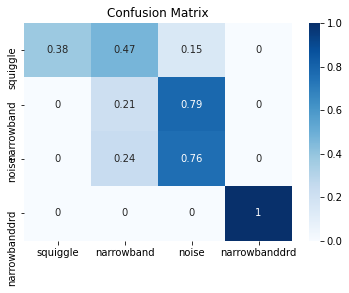

In [28]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);